<a href="https://colab.research.google.com/github/Magnusrm/TDAT3025-Machine-Learning/blob/master/Task1.2/oppg_d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

W0903 08:56:33.137021 139844818368384 deprecation.py:323] From <ipython-input-1-3c2a7c7c38b6>:6: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0903 08:56:33.138953 139844818368384 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0903 08:56:33.143138 139844818368384 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data/MNIST/train-images-idx3-ubyte.gz


W0903 08:56:33.559478 139844818368384 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0903 08:56:33.564365 139844818368384 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0903 08:56:33.654637 139844818368384 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be remove

Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


W0903 08:56:34.078015 139844818368384 deprecation.py:506] From <ipython-input-1-3c2a7c7c38b6>:72: calling argmax (from tensorflow.python.ops.math_ops) with dimension is deprecated and will be removed in a future version.
Instructions for updating:
Use the `axis` argument instead
W0903 08:56:34.081324 139844818368384 deprecation.py:323] From <ipython-input-1-3c2a7c7c38b6>:74: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



W1 = [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], b = [-1.0168673   0.87865484  0.2032151  -0.5519077   0.01698554  2.315727
 -0.40742812  1.3415387  -2.3200152  -0.45989534], loss = 0.18132667
Accuracy on test-set: 92.4%


FileNotFoundError: ignored

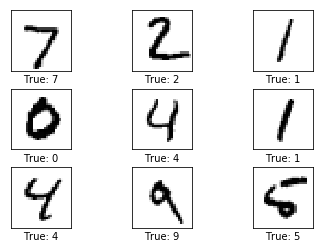

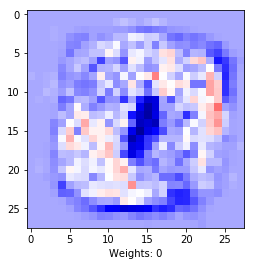

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("data/MNIST/", one_hot=True)
# convert classes as single numbers for compariosons. This is possible by getting the index of each number that is 1 for all rows.
data.test.cls = np.array([label.argmax() for label in data.test.labels])


''' variables '''
# MNIST image size 28x28
img_size = 28
#Images are stored in one-dimensional arrays of this length (because of one_hot = True)
img_size_flat = img_size * img_size
# Tuple used to reshape arrays
img_shape = (img_size, img_size)
# Number of classes, one class for each of 10 digits
num_classes = 10


''' Helper function for plotting images '''
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9

    # Create figure with 3x3 sub-plots
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        if cls_pred is None:
            xlabel = "True: %s" % cls_true[i]
        else:
            xlabel = "True: %s, Pred: %s" % (cls_true[i], cls_pred[i])
        ax.set_xlabel(xlabel)
        # Remove ticks from the plot
        ax.set_xticks([])
        ax.set_yticks([])


''' Plot a few images to see if data is correct '''
images = data.test.images[0:9]
#get true classes for these images
cls_true = data.test.cls[0:9]
plot_images(images=images, cls_true=cls_true)



class Model:
    def __init__(self):
        # Model input

        # x is of an array of arbitrary rows of floats with length equal ti img_size_flat (img_size * img_size)
        self.x = tf.placeholder(tf.float32, [None, img_size_flat])
        # y is the true labels
        self.y_true = tf.placeholder(tf.float32, [None, num_classes])
        # true labels in int form
        self.y_true_cls = tf.placeholder(tf.int64, [None])

        # Model variables
        self.W1 = tf.Variable(tf.zeros([img_size_flat, num_classes]))
        self.b = tf.Variable(tf.zeros([num_classes]))

        # Logits.
        logits = tf.matmul(self.x, self.W1) + self.b

        # predicted labels in vector form
        self.y_pred = tf.nn.softmax(logits)
        # predicted labels in int form
        self.y_pred_cls = tf.argmax(self.y_pred, dimension=1)

        cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=self.y_true)
        #cost = tf.reduce_mean(cross_entropy)
        self.loss = tf.reduce_mean(cross_entropy)


    '''
    def f(self, W, b, x):
        logits = tf.matmul(x, W) + b
        return tf.sigmoid(logits)
    '''

model = Model()

# Training: adjust the model so that its loss is minimized
minimize_operation = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(model.loss)
# Create session object for running TF operations
session = tf.Session()
# Init tf.Variable objects
session.run(tf.global_variables_initializer())

batch_size = 100

for epoch in range(10000):
    x_batch, y_true_batch = data.train.next_batch(batch_size)
    session.run(minimize_operation, {model.x: x_batch, model.y_true: y_true_batch})

# Evaluate training accuracy
W1, b, loss = session.run([model.W1, model.b, model.loss], {model.x: x_batch, model.y_true: y_true_batch})
print("W1 = %s, b = %s, loss = %s" % (W1, b, loss))


# to tf.image_summary format [batch_size, height, width, channels]


# this will display random 3 filters from the 64 in conv1
tf.summary.image('weights', W1, max_outputs=3)


# Compare all predicted labels to all true labels
correct_prediction = tf.equal(model.y_pred_cls, model.y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
#accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(f(x_train2), 1),tf.argmax(y_train2, 1)),tf.float32))




feed_dict_test = {model.x: data.test.images,
                  model.y_true: data.test.labels,
                  model.y_true_cls: data.test.cls}


def print_accuracy():
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    print("Accuracy on test-set: {0:.1%}".format(acc))

print_accuracy()


def get_weight_images():
    # Get the lowest and highest values for the weights, used for colors.
    w_min = np.min(W1)
    w_max = np.max(W1)

    fig, axes = plt.subplots(1, 1)

    for i in range(0, 10):
        image = W1[:, i].reshape(img_shape)
        axes.set_xlabel("Weights: %s" % i)
        axes.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')
        plt.savefig('weights/weights_%s' % i, dpi=None, facecolor='w', edgecolor='w',
                    orientation='portrait', papertype=None, format=None,
                    transparent=False, bbox_inches=None, pad_inches=0.1,
                    frameon=None, metadata=None)
get_weight_images()

def plot_weights():
    # Get the lowest and highest values for the weights, used for colors.
    w_min = np.min(W1)
    w_max = np.max(W1)

    # Create 3*4 figure
    fig, axes = plt.subplots(3,4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    # Place images
    for i, ax in enumerate(axes.flat):
        if i < 10:
            image = W1[:, i].reshape(img_shape)
            ax.set_xlabel("Weights: %s" % i)
            ax.imshow(image,vmin=w_min, vmax=w_max,cmap='seismic')

        # Remove ticks from all subplots
        ax.set_xticks([])
        ax.set_yticks([])
    plt.savefig('weights', dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None,
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)
    plt.show()



session.close()
